In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import  seaborn as sns

from Utils import sigmoid
from ExperientalTools import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
%reload_ext autoreload
%autoreload 2

# JUST AN EXAMPLE

In [2]:
(tr_x,tr_y), (vl_x,vl_y) = prepare_dataset(train_path="datasets/ML-CUP21-TR.csv")

In [3]:
instance = fit_cholesky(tr_x,tr_y, hidden=100,lambda_=0, activation=sigmoid)

In [4]:
get_results(instance,vl_x,vl_y)

2.156456580698822

In [30]:
instance = fit_fista(tr_x,tr_y, hidden=500, lambda_=0, max_inters=10000, activation=sigmoid)

In [31]:
mse_errors =pd.DataFrame(instance[1],columns=["MSE errors"])
mse_errors["iterations"] = mse_errors.index

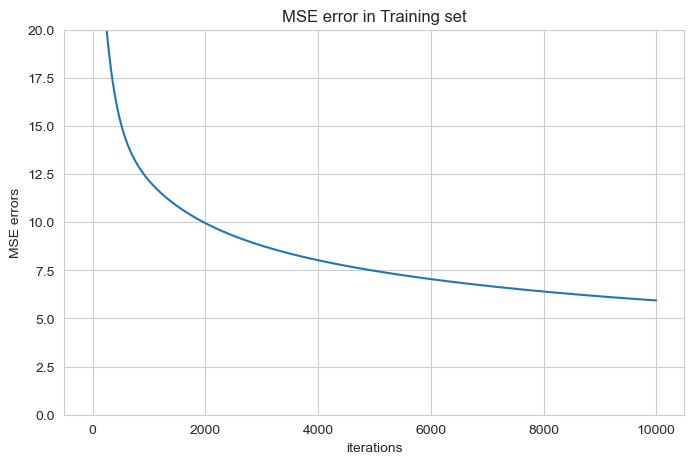

In [34]:
f, axs = plt.subplots(figsize=(8,5))
sns.lineplot(data=mse_errors, x="iterations", y="MSE errors", ax=axs)
axs.set_ylim([0,20])
axs.set_title("MSE error in Training set")
plt.show()

# GRIDSEARCH CHOLESKY

In [37]:
parameter_grid = dict(
    hidden=[*range(10,500,10)],
    regularization =  [1e-01, 5e-02, 1e-02, 5e-03, 1e-03],
    activation_fun = [sigmoid]
)
GridSearch_cholesky("datasets/ML-CUP21-TR.csv",configs=parameter_grid)

100%|██████████| 245/245 [01:22<00:00,  2.97it/s, minMSE=2]   


The best configuration is  {'activation_fun': <function sigmoid at 0x000002C8E2692DE0>, 'hidden': 330, 'regularization': 0.01}
Train error  1.2263077668983142  Validation error 2.0037037380874825


# GRIDSEARCH FISTA

In [40]:
parameter_grid = dict(
    hidden=[*range(10,500,10)],
    regularization =  [1e-01, 5e-02, 1e-02, 5e-03, 1e-03],
    activation_fun = [sigmoid],
    max_iter=[10000]
)
GridSearch_fista("datasets/ML-CUP21-TR.csv",configs=parameter_grid)

100%|██████████| 245/245 [08:00<00:00,  1.96s/it, minMSE=11.9]


The best configuration is  {'activation_fun': <function sigmoid at 0x000002C8E2692DE0>, 'hidden': 240, 'max_iter': 10000, 'regularization': 0.001}
Train error  11.585680554135415  Validation error 11.909962646075746
